In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;

In [3]:
df = pd.read_csv("./cars.csv");
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


32


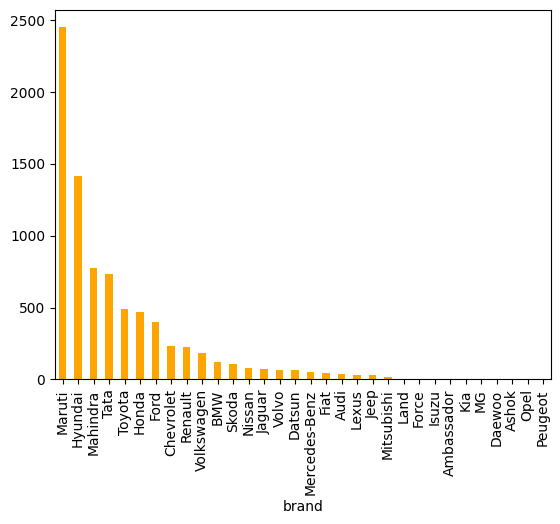

In [24]:
print(df.brand.nunique())
df.brand.value_counts().plot(kind='bar',color='orange');

In [4]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [5]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [6]:
df['owner'].nunique()

5

<h2>OneHotEncoder</h2>

In [7]:
from sklearn.model_selection import train_test_split;
X_train , X_test , y_train , y_test = train_test_split(df.iloc[: , 0:4] , df.iloc[: , -1] , test_size=0.2 , random_state=0);

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder(dtype=np.int32, drop='first');

In [19]:
X_train_new = ohe.fit_transform(X_train[['fuel' , 'owner']]).toarray()
X_train_new

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], shape=(6502, 7), dtype=int32)

In [11]:
X_test_new = ohe.transform(X_test[['fuel' , 'owner']]).toarray()

In [12]:
np.hstack((X_train[['brand' , 'km_driven']].values , X_train_new))

array([['Hyundai', 60000, 0, ..., 0, 0, 0],
       ['Tata', 150000, 1, ..., 0, 0, 1],
       ['Hyundai', 110000, 1, ..., 1, 0, 0],
       ...,
       ['Hyundai', 90000, 0, ..., 1, 0, 0],
       ['Volkswagen', 90000, 1, ..., 0, 0, 0],
       ['Hyundai', 110000, 0, ..., 0, 0, 0]],
      shape=(6502, 9), dtype=object)

## **for more categories**
    

In [13]:
counts = df['brand'].value_counts()

In [14]:
repl = counts[counts < 100].index
pd.get_dummies(df['brand'].replace(repl , 'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False
